In [2]:
import seaborn as sns
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from tqdm.autonotebook import tqdm
rc("font", **{"family": "serif", "serif": ["Computer Modern"], "size": 18})
rc("text", usetex=True)
lecs_names = [
    r'$\tilde{C}^{pp}_{1S0}$',
    r'$\tilde{C}^{np}_{1S0}$',
    r'$\tilde{C}^{nn}_{1S0}$',
    r'$\tilde{C}_{3S1}$',
    r'$C_{1S0}$',
    r'$C_{3P0}$',
    r'$C_{1P1}$',
    r'$C_{3P1}$',
    r'$C_{3S1}$',
    r'$C_{E1}$',
    r'$C_{3P2}$',
    r'$C_1$',
    r'$C_2$',
    r'$C_3$',
    r'$C_4$',
    r'$C_{D}$',
    r'$C_{E}$'
]

/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_2884/2069958231.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
res_path = '../../../LABS/all_SOBOL/sobols_id_*'
all_sobol_results = glob.glob(res_path)

def load(path):
    return np.load(path, allow_pickle=True).item()

In [4]:
all_ready_analysis = {"fidelity": [], "analysis": []}
all_n_analysis = {"N": [], "E_b": {'S1':[], 'S1_conf':[], 'ST':[], 'ST_conf':[]}, "R_ch": {'S1':[], 'S1_conf':[], 'ST':[], 'ST_conf':
[]}}
for fidelity in [8]:
    for n in range(4, 17):
        all_runs_scores = {"E_b": {'S1':[], 'S1_conf':[], 'ST':[], 'ST_conf':[]} , "R_ch": {'S1':[], 'S1_conf':[], 'ST':[], 'ST_conf':[]}}
        resuls_with_n = glob.glob(res_path + f'/*N_{n}_*_fidelity_{fidelity}.npy')
        num_results = len(resuls_with_n)
        for run in (resuls_with_n):
            results = load(run)
            for key in all_runs_scores.keys(): # E_b, R_ch
                for key2 in all_runs_scores[key].keys(): # S1, S1_conf, ST, ST_conf
                    all_runs_scores[key][key2].append(results[key][key2])
        all_n_analysis["N"].append(n)
        for key in all_runs_scores.keys(): # E_b, R_ch
            for key2 in all_runs_scores[key].keys(): # S1, S1_conf, ST, ST_conf
                all_n_analysis[key][key2].append(np.mean(all_runs_scores[key][key2], axis=0))


/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_2884/1188985134.py:22: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  bar1 = sns.barplot(
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_2884/1188985134.py:52: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  bar1 = sns.barplot(
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_2884/1188985134.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(lecs_names, rotation=45, fontsize=18)


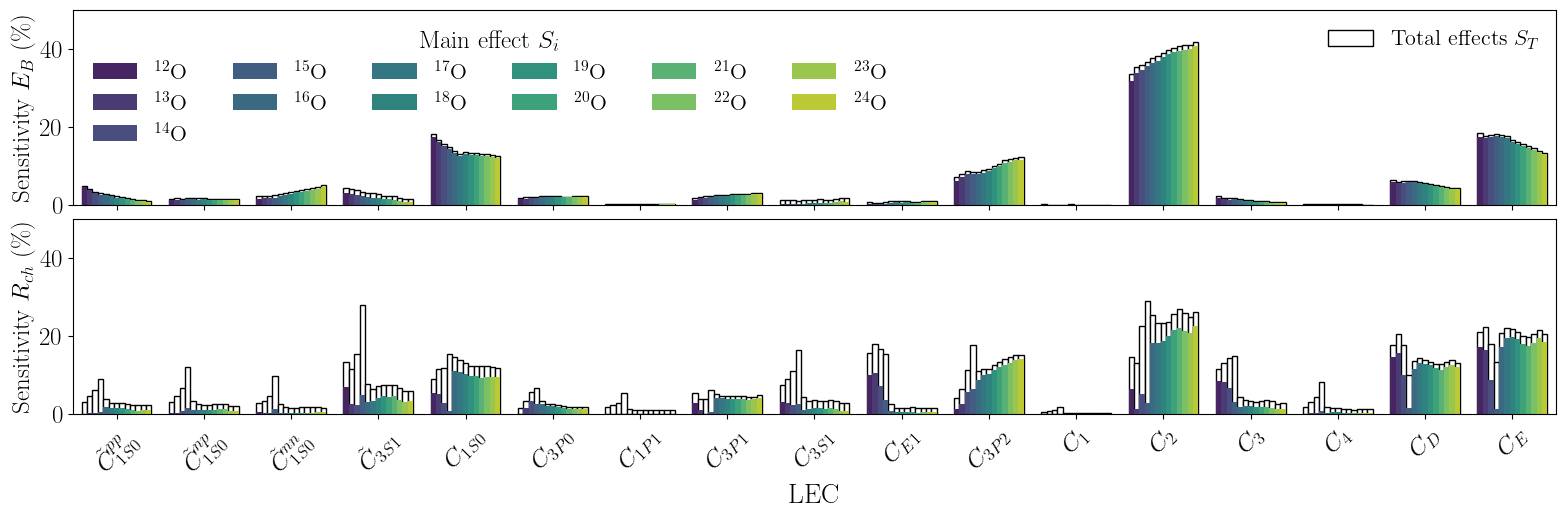

In [5]:
import seaborn as sns
sobol_results = all_n_analysis

isotope_names = [fr"$^{{{A}}}$O" for A in range(12, 25)]

s1_importances_Eb = pd.DataFrame(all_n_analysis["E_b"]["S1"], columns=lecs_names, index=all_n_analysis["N"]).reset_index().rename(columns={"index": "N"})
s1_importances_Rch = pd.DataFrame(all_n_analysis["R_ch"]["S1"], columns=lecs_names, index=all_n_analysis["N"]).reset_index().rename(columns={"index": "N"})
sT_importances_Eb = pd.DataFrame(all_n_analysis["E_b"]["ST"], columns=lecs_names, index=all_n_analysis["N"]).reset_index().rename(columns={"index": "N"})
sT_importances_Rch = pd.DataFrame(all_n_analysis["R_ch"]["ST"], columns=lecs_names, index=all_n_analysis["N"]).reset_index().rename(columns={"index": "N"})

melted_sobol_df_Eb = s1_importances_Eb.melt(
    id_vars='N', var_name='Feature', value_name='S1')
melted_sobol_df_Rch = s1_importances_Rch.melt(
    id_vars='N', var_name='Feature', value_name='S1')
melted_sobol_df_Eb_sT = sT_importances_Eb.melt(
    id_vars='N', var_name='Feature', value_name='ST')
melted_sobol_df_Rch_sT = sT_importances_Rch.melt(
    id_vars='N', var_name='Feature', value_name='ST')
palette = sns.color_palette('viridis', n_colors=len(isotope_names))
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

bar1 = sns.barplot(
    data=melted_sobol_df_Eb_sT,
    x='Feature',
    y='ST',
    hue='N',
    linewidth=1,
    edgecolor="black",
    color='white',
    facecolor = 'white',
    order=lecs_names,
    errorbar=None,
    ax=axes[0],
)
bar2 = sns.barplot(
    data=melted_sobol_df_Eb,
    x='Feature',
    y='S1',
    hue='N',
    palette=palette,
    order=lecs_names,
    ax=axes[0],
)
axes[0].set_ylabel('Sensitivity $E_{B}$ (\%)', fontsize=18)

handles, labels = bar1.get_legend_handles_labels()
legend1 = axes[0].legend(handles[7:], isotope_names, loc='upper left',
           ncol=6, fontsize=16, title=r'Main effect $S_i$', title_fontsize=18, frameon=False)
axes[0].add_artist(legend1)
axes[0].legend([handles[6]], [r'Total effects $S_T$'], loc='upper right',
           fontsize=16, frameon=False)
bar1 = sns.barplot(
    data=melted_sobol_df_Rch_sT,
    x='Feature',
    y='ST',
    hue='N',
    linewidth=1,
    edgecolor="black",
    color='white',
    facecolor = 'white',
    order=lecs_names,
    errorbar=None,
    ax=axes[1],
)
bar2 = sns.barplot(
    data=melted_sobol_df_Rch,
    x='Feature',
    y='S1',
    hue='N',
    palette=palette,
    order=lecs_names,
    ax=axes[1],
)
def formatter(x, pos):
    del pos
    return str(int(x*100))
axes[1].legend_.remove()
axes[1].set_xlabel('LEC', fontsize=20)
axes[1].set_ylabel(r'Sensitivity $R_{ch}$ (\%)', fontsize=18)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='both', labelsize=18)
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
axes[0].set_ylim(0,0.5)
axes[1].set_ylim(0, 0.5)
axes[0].set_xticklabels(lecs_names, rotation=45, fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.07)
plt.savefig('sobol_sensitivity.pdf', bbox_inches='tight')

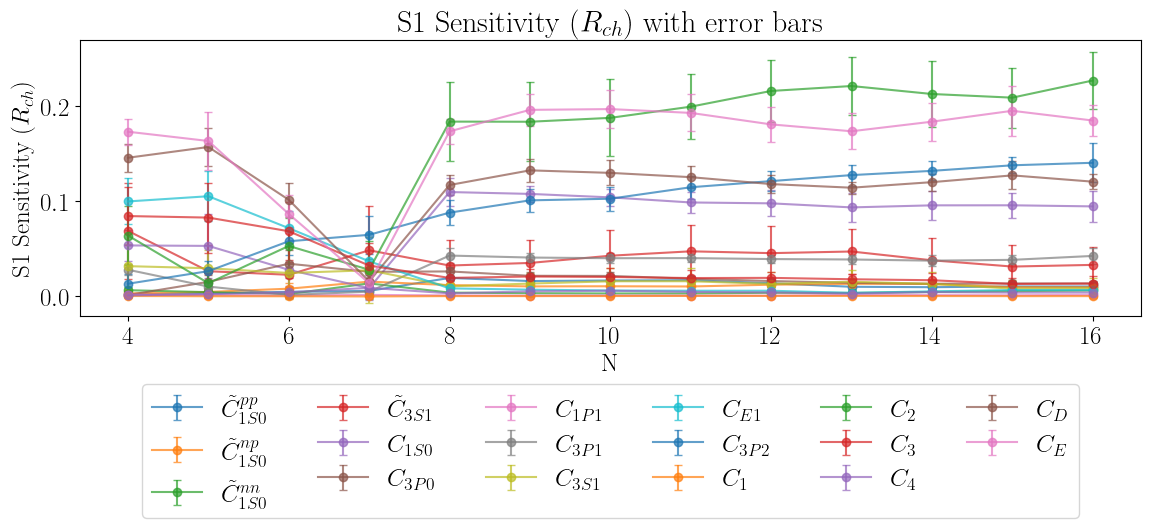

In [6]:
# Compute standard deviations across runs for each N and each feature
std_analysis = {"E_b": {"S1": [], "ST": []}, "R_ch": {"S1": [], "ST": []}}
Ns = list(range(4, 17))

for fidelity in [8]:
    for n in Ns:
        results_files = glob.glob(res_path + f'/*N_{n}_*_fidelity_{fidelity}.npy')
        E_b_S1_runs, E_b_ST_runs = [], []
        Rch_S1_runs, Rch_ST_runs = [], []
        for run in results_files:
            results = load(run)
            E_b_S1_runs.append(results["E_b"]["S1"])
            E_b_ST_runs.append(results["E_b"]["ST"])
            Rch_S1_runs.append(results["R_ch"]["S1"])
            Rch_ST_runs.append(results["R_ch"]["ST"])
        std_analysis["E_b"]["S1"].append(np.std(E_b_S1_runs, axis=0))
        std_analysis["E_b"]["ST"].append(np.std(E_b_ST_runs, axis=0))
        std_analysis["R_ch"]["S1"].append(np.std(Rch_S1_runs, axis=0))
        std_analysis["R_ch"]["ST"].append(np.std(Rch_ST_runs, axis=0))

avg_S1_Eb = pd.DataFrame(all_n_analysis["R_ch"]["S1"], columns=lecs_names, index=Ns)
std_S1_Eb = pd.DataFrame(std_analysis["R_ch"]["S1"], columns=lecs_names, index=Ns)

plt.figure(figsize=(12,6))
for feature in lecs_names:
    plt.errorbar(Ns, avg_S1_Eb[feature], yerr=std_S1_Eb[feature],
                 fmt='-o', capsize=3, label=feature, alpha=0.7)
plt.xlabel('N')
plt.ylabel('S1 Sensitivity ($R_{ch}$)')
plt.title('S1 Sensitivity ($R_{ch}$) with error bars')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=6)
plt.tight_layout()
plt.show()


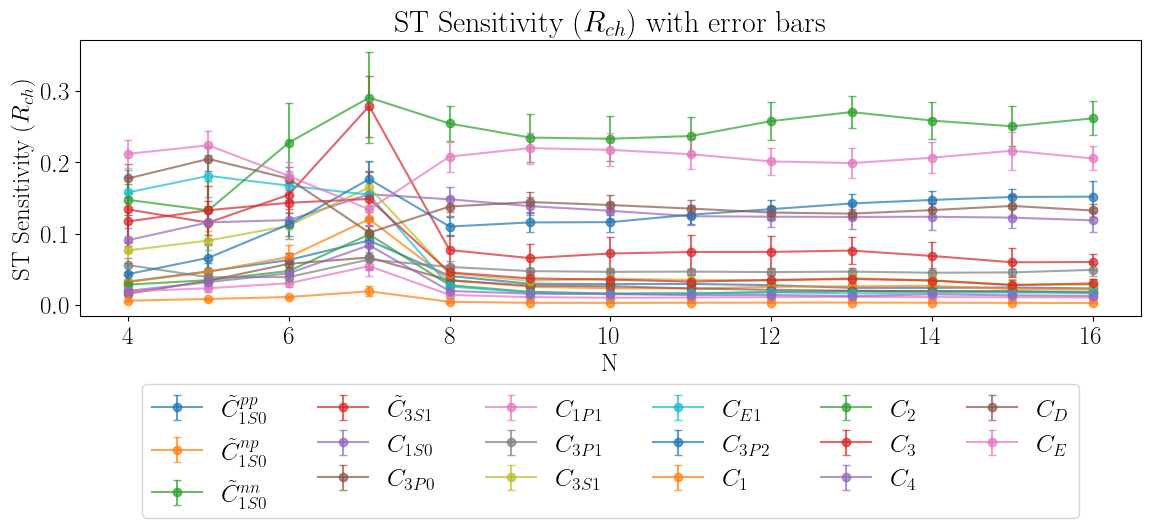

In [7]:
avg_ST_Rch = pd.DataFrame(all_n_analysis["R_ch"]["ST"], columns=lecs_names, index=Ns)
std_ST_Rch = pd.DataFrame(std_analysis["R_ch"]["ST"], columns=lecs_names, index=Ns)

plt.figure(figsize=(12,6))
for feature in lecs_names:
    plt.errorbar(Ns, avg_ST_Rch[feature], yerr=std_ST_Rch[feature],
                 fmt='-o', capsize=3, label=feature, alpha=0.7)
plt.xlabel('N')
plt.ylabel('ST Sensitivity ($R_{ch}$)')
plt.title('ST Sensitivity ($R_{ch}$) with error bars')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=6)
plt.tight_layout()
plt.show()

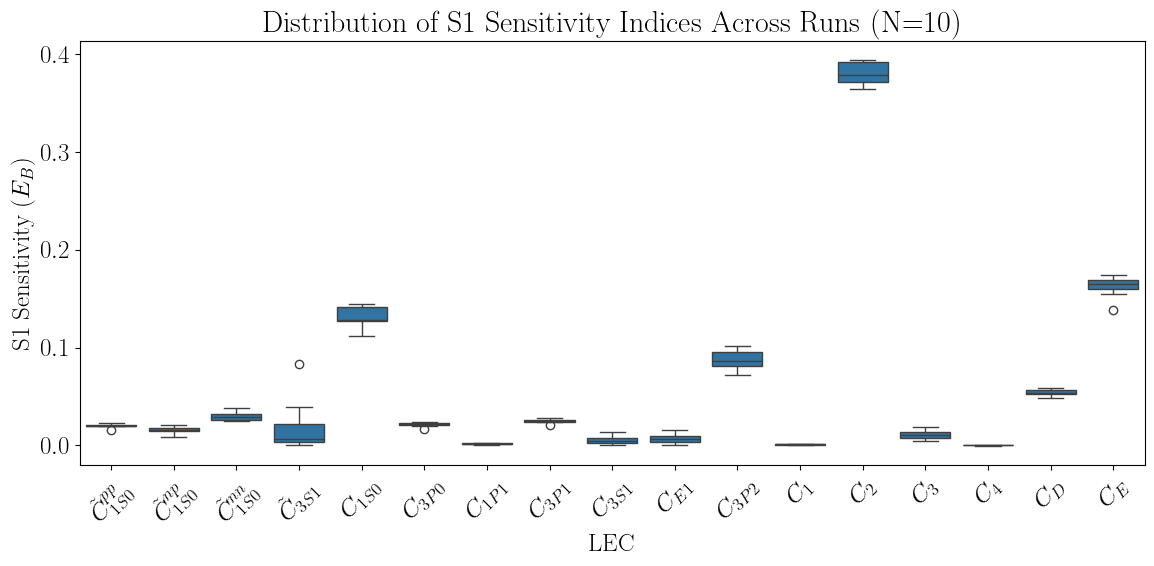

In [8]:
N_fixed = 10
results_files_fixed = glob.glob(res_path + f'/*N_{N_fixed}_*_fidelity_8.npy')
E_b_S1_data = {feature: [] for feature in lecs_names}

for run in results_files_fixed:
    results = load(run)
    for idx, feature in enumerate(lecs_names):
        E_b_S1_data[feature].append(results["E_b"]["S1"][idx])

boxplot_df = pd.DataFrame(E_b_S1_data)
boxplot_df_melted = boxplot_df.melt(var_name='Feature', value_name='S1')

plt.figure(figsize=(12,6))
sns.boxplot(data=boxplot_df_melted, x='Feature', y='S1')
plt.xlabel('LEC')
plt.ylabel('S1 Sensitivity ($E_B$)')
plt.title('Distribution of S1 Sensitivity Indices Across Runs (N=10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


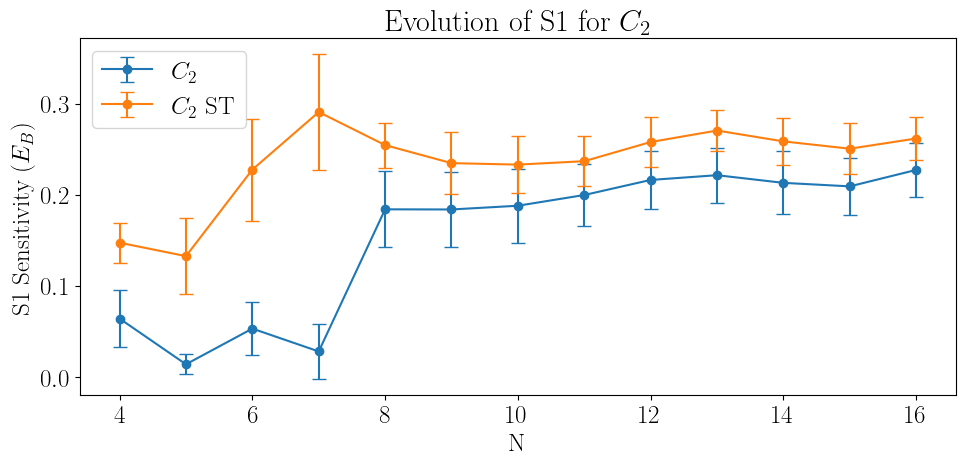

In [11]:
# Example: Plot the evolution of S1 for a chosen feature across N
feature_to_plot = lecs_names[-5]  # Change index as desired
s1_values = [avg_S1_Eb[feature_to_plot].loc[n] for n in Ns]
s1_std = [std_S1_Eb[feature_to_plot].loc[n] for n in Ns]

st_values = [avg_ST_Rch[feature_to_plot].loc[n] for n in Ns]
st_std = [std_ST_Rch[feature_to_plot].loc[n] for n in Ns]

plt.figure(figsize=(10,5))
plt.errorbar(Ns, s1_values, yerr=s1_std, fmt='-o', capsize=5, label=feature_to_plot)
plt.errorbar(Ns, st_values, yerr=st_std, fmt='-o', capsize=5, label=f"{feature_to_plot} ST")
plt.xlabel('N')
plt.ylabel('S1 Sensitivity ($E_B$)')
plt.title(f'Evolution of S1 for {feature_to_plot}')
plt.legend()
plt.tight_layout()
plt.show()
